# Análise de dados Crédito - EBAC - SQL

## Análise Exploratória

### Criação da tabela no ATHENA com os dados armazenados na S3 a partir do CSV fornecido pelo curso

In [1]:
CREATE EXTERNAL TABLE IF NOT EXISTS default.credito (
id int,
idade int, 
sexo string,
dependentes int,   
escolaridade string,
estado_civil string,
salario_anual string,
tipo_cartao string,
qtd_produtos int,
meses_inativo_12m int,
interacoes_12m int,
limite_credito double,
valor_transacoes_12m double,
qtd_transacoes_12m bigint
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
  'serialization.format' = ';',
  'field.delim' = ';'
) LOCATION 's3://modulo35/credito/'
TBLPROPERTIES ('has_encrypted_data'='false');

SyntaxError: invalid syntax (1385648677.py, line 1)

### Contando as linhas

SELECT COUNT(*) FROM credito

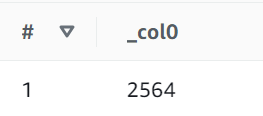


### Tipos de dados

DESCRIBE credito

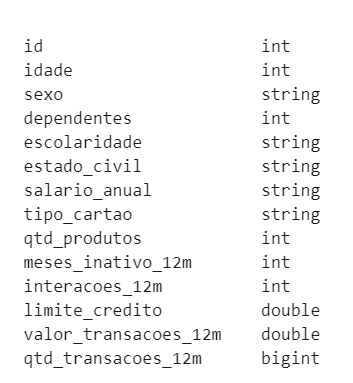

### Faixas de idade dos clientes

In [ ]:
SELECT 
    MIN(idade) as idade_min,
    MAX(idade) as idade_max,
    CAST(AVG(idade) AS int) AS
        media_idade,
    CAST(STDDEV(idade) AS int) AS
        std_idade
FROM credito;

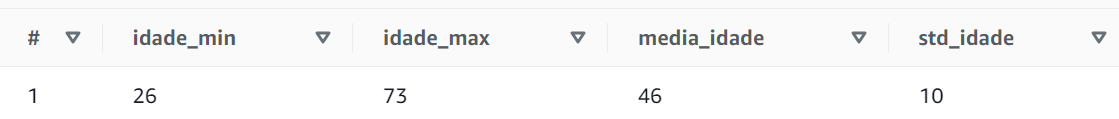

### A idade dos clientes se encontra bem distribuída entre 26-73, com a média de 46 anos sendo bem representativa, os dados estão bem distribuídos com um desvio padrão de 10 anos.


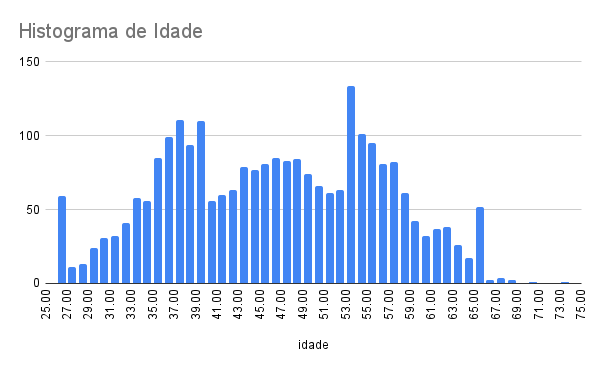

### Distribuição do Sexo dos Clientes

In [ ]:
SELECT 
    sexo,
    COUNT(sexo) AS 
        clientes,
    ROUND(COUNT(sexo)/2564.00*100, 2) AS
        porcentagem
FROM projeto_credito.credito
GROUP BY sexo;


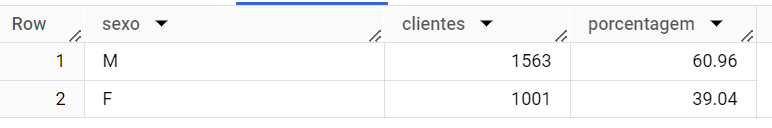

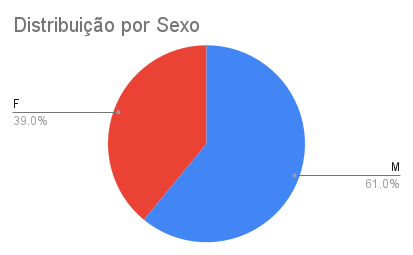

#### 61% são homens e 39% são mulheres

### Distribuição por número de dependentes

In [ ]:
SELECT 
    dependentes AS 
        numero_dependentes,
    ROUND(COUNT(dependentes)/2564.00 * 100, 2) AS
        porcentagem
FROM credito
GROUP BY dependentes
ORDER BY 1 ASC;

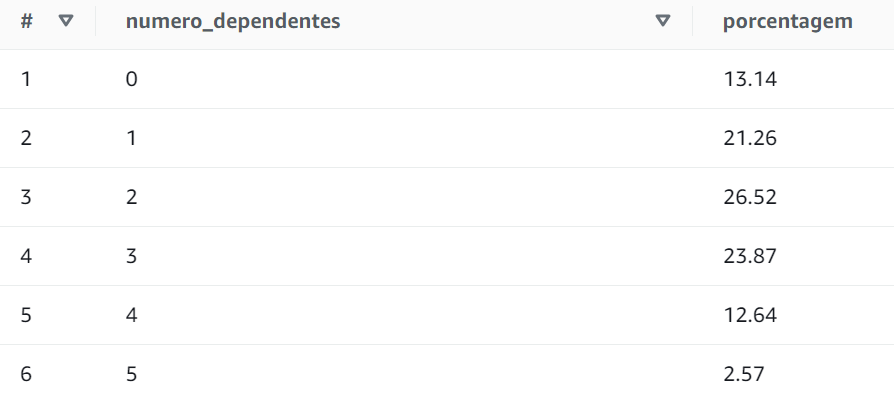

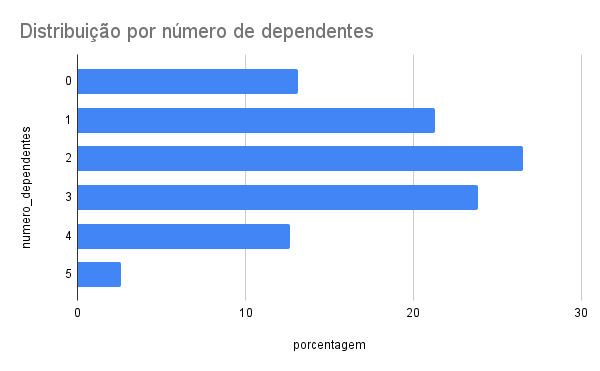

#### A maior parte dos clientes tem entre 1 e 3 dependentes

### Distribuição por nível de escolaridade

In [ ]:
SELECT 
    escolaridade,
    COUNT(escolaridade) AS 
        nivel_escolaridade,
    ROUND(COUNT(escolaridade)/2564.00, 2) AS
        porcentagem
FROM  credito
GROUP BY escolaridade
ORDER BY 3 DESC;



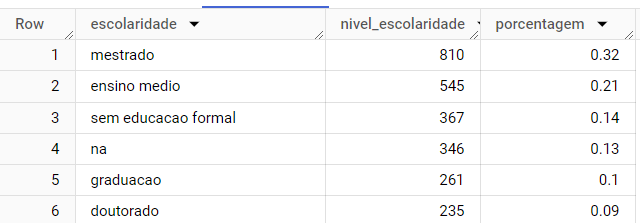

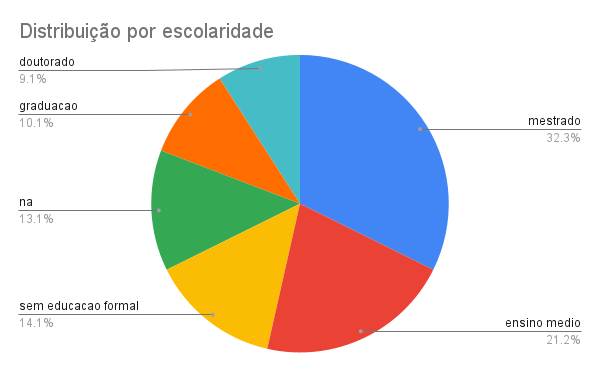

#### A cada 100 clientes, 14 não possuem educação formal, cerca de 51% tem ensino superior, 13% não possuem informações no cadastro.

### Distribuição por Estado Civil

In [ ]:
SELECT 
    estado_civil,
    COUNT(estado_civil) AS 
        clientes,
    ROUND(COUNT(estado_civil)/2057.00, 2) AS
        porcentagem
FROM projeto_credito.credito
GROUP BY estado_civil
ORDER BY 3 DESC;


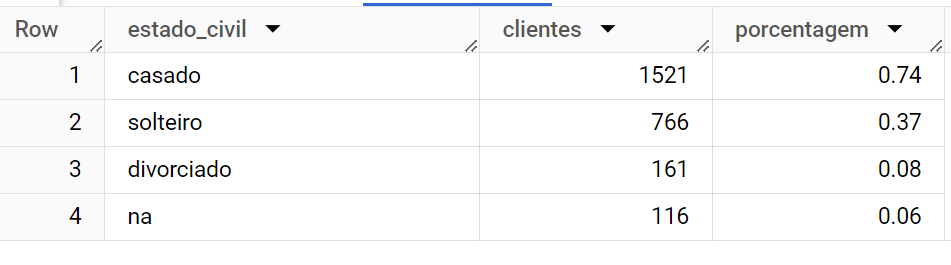

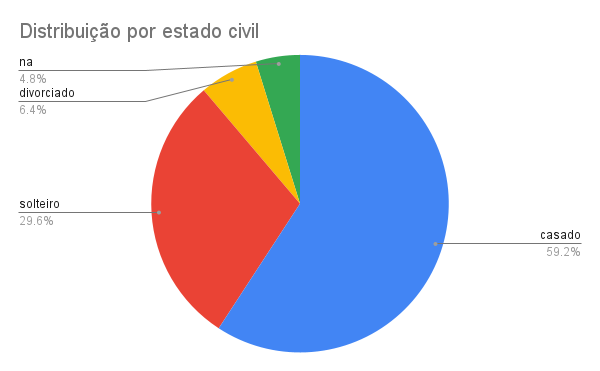

#### 6 a cada 100 clientes são divorciados, a maioria e casado e 4,8% não possuem informação no cadastro.

### Distribuição por salário anual

In [ ]:
SELECT 
        salario_anual,
        COUNT(salario_anual) AS 
        clientes,
        ROUND(COUNT(salario_anual)/2057.00, 2) AS
        porcentagem
FROM projeto_credito.credito
GROUP BY salario_anual;


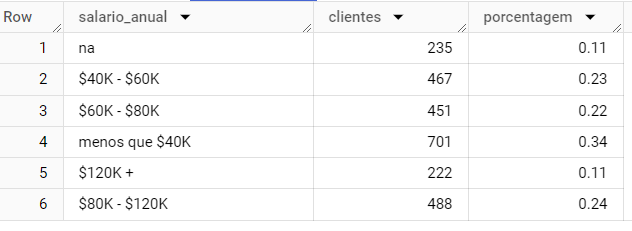

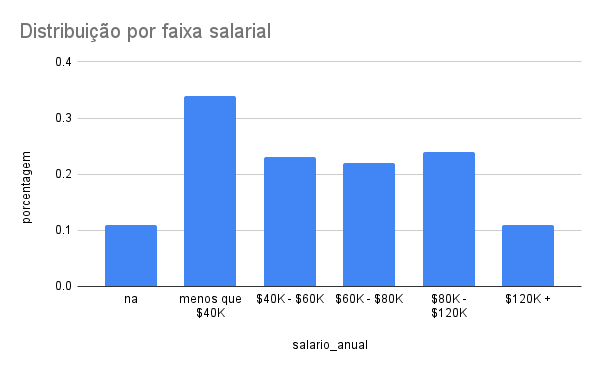

#### Mais de 30% recebe menos que 40 mil anuais, cerca de 10% não possui informação e os outros 60% recebem mais de 40 mil anuais.

### Distribuição por tipo de cartão

In [ ]:
SELECT 
    tipo_cartao,
    COUNT(tipo_cartao) AS 
        clientes,
    ROUND(COUNT(tipo_cartao)/2564.00*100, 2) AS
        porcentagem
FROM projeto_credito.credito
GROUP BY tipo_cartao
ORDER BY 3 DESC;



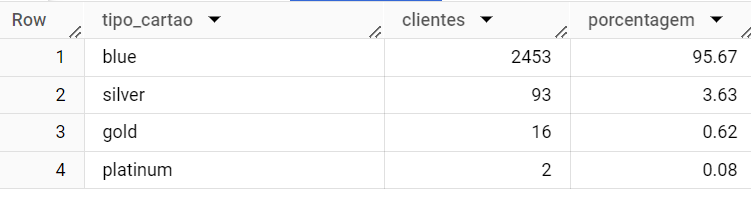

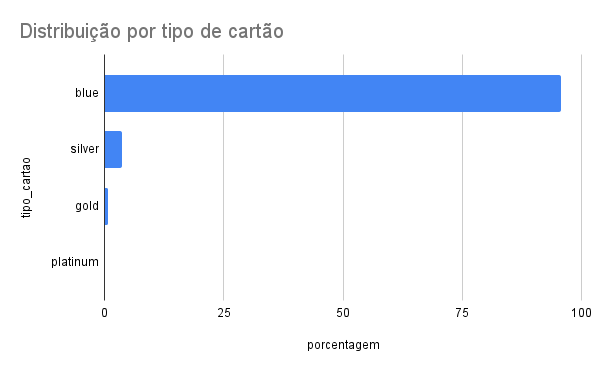

#### 95% dos clientes tem o cartão Blue, os outros são mais exclusivos.

### Distribuição por Limite de Crédito dos Clientes

In [ ]:
SELECT
        ROUND(MIN(limite_credito), 2) AS
        limite_minimo,
        ROUND(MAX(limite_credito), 2) AS
        limite_maximo,
        ROUND(AVG(limite_credito), 2) AS
        limite_medio,
        ROUND(STDDEV(limite_credito), 2) AS
        std_limite
    FROM projeto_credito.credito;



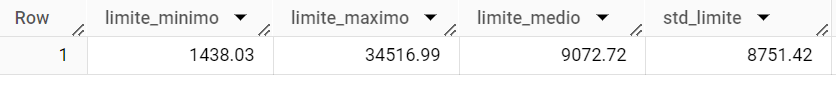

#### O limite mínimo é de R 1438,00 o limite máximo é de R 34.516,99, o ticket médio é de R 9.072,72 e o desvio padrão é de R 8.751,42

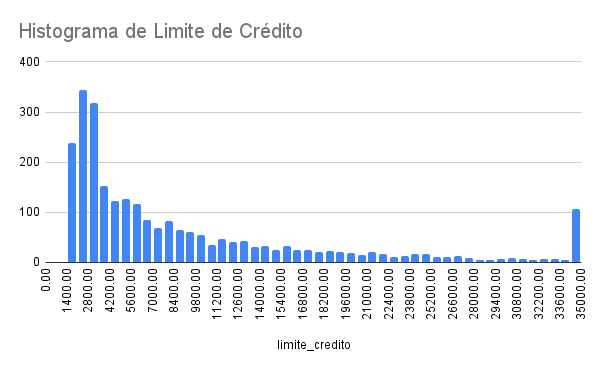

#### A maior concentração de limites de acordo com o histograma é de até 2800 e a a maior concentração de outliers está na faixa de 35 mil reais de limite.

# Análise

### Criando uma view sem dados ausentes

--Criando a view sem dados ausentes:
CREATE VIEW credito_eda AS
SELECT *
FROM credito
WHERE 
  (escolaridade != 'na') AND
  (estado_civil != 'na') AND
  (salario_anual != 'na');

In [ ]:
--Criando a view sem dados ausentes:
CREATE VIEW credito_eda AS
SELECT *
FROM credito
WHERE 
  (escolaridade != 'na') AND
  (estado_civil != 'na') AND
  (salario_anual != 'na');

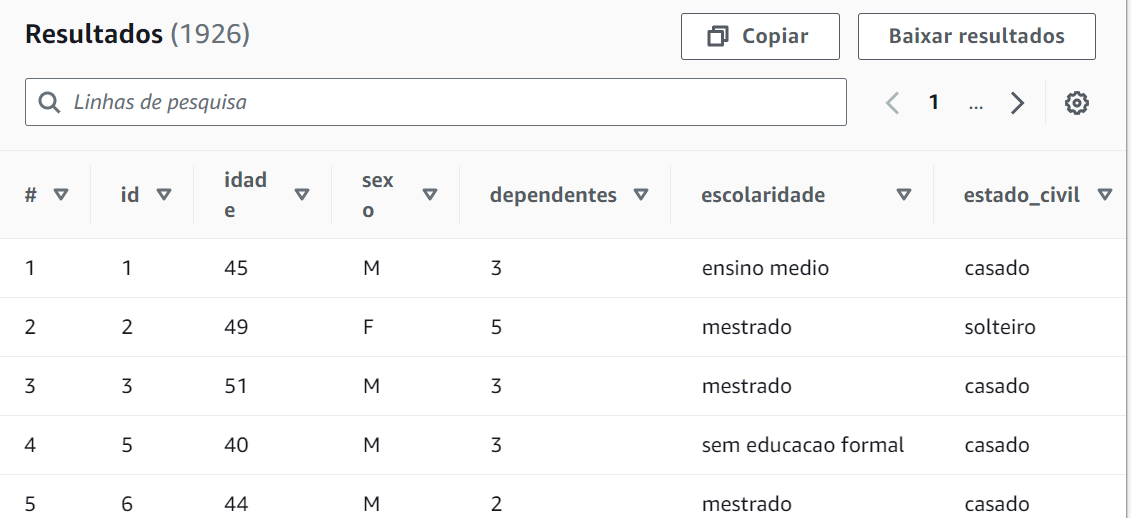

#### 1926 linhas

### Quais as características dos clientes com maior crédito?

In [ ]:
SELECT 
  limite_credito, idade, sexo, 
  dependentes, escolaridade, 
  estado_civil, salario_anual, 
  tipo_cartao, qtd_produtos, 
  valor_transacoes_12m, 
  qtd_transacoes_12m
FROM credito_eda
ORDER BY 1 DESC
LIMIT 10;

In [ ]:
#	limite_credito	idade	sexo	dependentes	escolaridade	estado_civil	salario_anual	tipo_cartao	qtd_produtos	valor_transacoes_12m	qtd_transacoes_12m
1	34516.99	46	M	2	sem educacao formal	divorciado	$80K - $120K	blue	6	1628.57	51
2	34516.98	39	M	4	mestrado	solteiro	$60K - $80K	gold	3	3899.27	78
3	34516.97	52	M	2	mestrado	solteiro	$120K +	blue	5	1616.98	50
4	34516.96	47	M	2	sem educacao formal	casado	$80K - $120K	silver	4	3018.82	60
5	34516.95	35	M	0	ensino medio	solteiro	$80K - $120K	gold	6	2949.7	70
6	34516.95	57	M	2	sem educacao formal	solteiro	$80K - $120K	blue	5	1233.86	26
7	34516.94	48	M	4	graduacao	casado	$60K - $80K	gold	2	1350.53	32
8	34516.92	50	M	3	mestrado	divorciado	$80K - $120K	blue	4	1770.94	65
9	34516.92	34	M	4	sem educacao formal	solteiro	$120K +	blue	6	1969.02	46
10	34516.91	38	M	4	ensino medio	solteiro	$80K - $120K	gold	6	1445.69	45


#### Os clientes com os 10 maiores limites são homens, apenas 2 casados, 2 divorciados e o restante solteiros, chama atenção que 4 não possuem educação formal, o mais jovem tem 34 anos e o mais velho 57, a maioria tem 2 dependentes ou mais, apenas 1 não tem dependentes.

### Quais as carecterísticas dos clientes com menores limites?

In [ ]:
SELECT 
  limite_credito, idade, sexo, 
  dependentes, escolaridade, 
  estado_civil, salario_anual, 
  tipo_cartao, qtd_produtos, 
  valor_transacoes_12m, 
  qtd_transacoes_12m
FROM credito_view
ORDER BY 1 ASC
LIMIT 10;

In [ ]:
#	limite_credito	idade	sexo	dependentes	escolaridade	estado_civil	salario_anual	tipo_cartao	qtd_produtos	valor_transacoes_12m	qtd_transacoes_12m
1	1438.03	62	F	0	graduacao	casado	$40K - $60K	blue	6	1281.15	32
2	1438.04	59	F	0	doutorado	casado	$40K - $60K	blue	1	689.19	23
3	1438.07	61	M	0	doutorado	casado	menos que $40K	blue	6	1448.62	31
4	1438.08	54	F	1	mestrado	casado	menos que $40K	blue	2	705.59	19
5	1438.12	52	F	2	sem educacao formal	casado	$40K - $60K	blue	5	1679.97	39
6	1438.14	32	F	2	mestrado	solteiro	menos que $40K	blue	5	2580.72	67
7	1438.14	61	F	0	mestrado	casado	menos que $40K	blue	6	840.38	20
8	1438.17	64	F	1	ensino medio	casado	$40K - $60K	blue	4	1417.06	35
9	1438.18	34	M	2	sem educacao formal	casado	$40K - $60K	blue	5	2243.76	43
10	1438.19	31	M	2	sem educacao formal	casado	menos que $40K	blue	3	2789.99	50


#### A maioria são mulheres, 60% com ensino superior, com no máximo dependentes, faixa salarial até no máximo 60 mil anuais, apenas uma solteira.

### Então afinal qual a distribuição de limite de crédito por sexo?

In [ ]:
SELECT 
    sexo,
    CAST(SUM(limite_credito) as int) as limite_por_sexo
FROM credito_view
GROUP BY 1

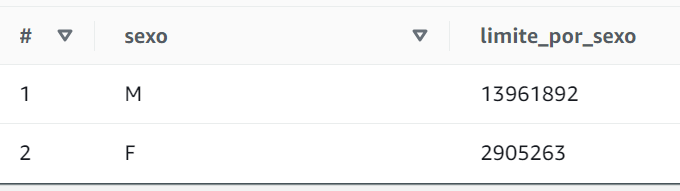

### Os homens possuem 4,8x mais crédito que as mulheres

### Qual o reflexo da desigualdade salarial?

In [ ]:
SELECT 
  sexo, 
  salario_anual, 
  COUNT(salario_anual) as total_clientes
FROM credito_view
GROUP BY 
  sexo, 
  salario_anual
ORDER BY 2, 1;

In [ ]:
#	sexo	salario_anual	total_clientes
1	M	$120K +	181
2	F	$40K - $60K	161
3	M	$40K - $60K	224
4	M	$60K - $80K	363
5	M	$80K - $120K	400
6	F	menos que $40K	508
7	M	menos que $40K	89


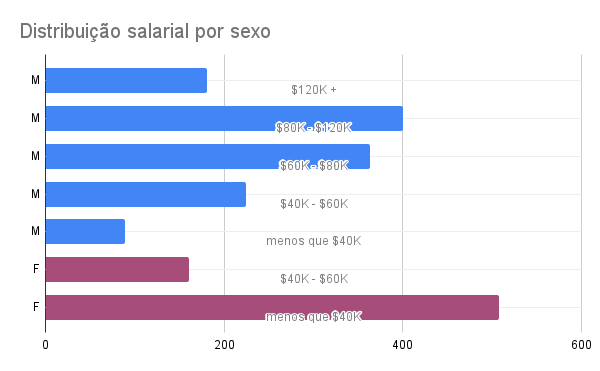

### A grande maioria das mulheres recebem menos de 40 mil, nenhuma recebe mais de 60 mil.

### Isso é reflexo da escolarização?

In [ ]:
SELECT 
  sexo, 
  escolaridade, 
  COUNT(escolaridade) as total_clientes
FROM credito_view
GROUP BY 
    1,2
ORDER BY 2, 1;

In [ ]:
#	sexo	escolaridade	total_clientes
1	F	doutorado	71
2	M	doutorado	128
3	F	ensino medio	145
4	M	ensino medio	326
5	F	graduacao	78
6	M	graduacao	152
7	F	mestrado	253
8	M	mestrado	454
9	F	sem educacao formal	122
10	M	sem educacao formal	197


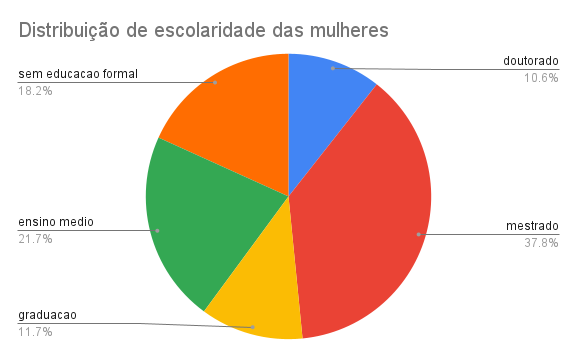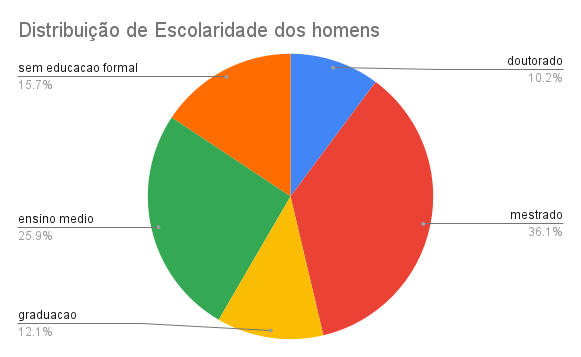

### A distribuição de escolaridade é muito semelhante entre homens e mulheres.

# Conclusão

### A partir dessa análise se conclui que embora tenha o mesmo nível de escolaridade, na nossa sociedade ainda há desigualdade salarial entre homens e mulheres, e por decorrência disso, as mulheres recebem menos crédito.